In [20]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [21]:
# Set the paths to your rock, paper, and scissor folders
rock_folder = 'rock/'
paper_folder = 'paper/'
scissor_folder = 'scissors/'

In [22]:
# Parameters for resizing images
image_width = 128  # Desired width
image_height = 128  # Desired height

In [23]:
# Function to extract HOG features from an image
def extract_hog_features(image):
    hog = cv2.HOGDescriptor()
    hog_features = hog.compute(image)
    hog_features = hog_features.reshape(-1)  # Flatten the feature vector
    return hog_features

In [24]:
# Load and process the images
X = []
y = []

In [25]:
# Load rock images
print('started:', rock_folder)
for filename in os.listdir(rock_folder):
    if filename.endswith('.png'):
        image = cv2.imread(os.path.join(rock_folder, filename))
        image = cv2.resize(image, (image_width, image_height))  # Resize the image
        hog_features = extract_hog_features(image)
        X.append(hog_features)
        y.append(0)  # Rock class label
print('ended:', rock_folder)

started: rock/
ended: rock/


In [9]:
# Load paper images
print('started:', paper_folder)
for filename in os.listdir(paper_folder):
    if filename.endswith('.png'):
        image = cv2.imread(os.path.join(paper_folder, filename))
        image = cv2.resize(image, (image_width, image_height))  # Resize the image
        hog_features = extract_hog_features(image)
        X.append(hog_features)
        y.append(1)  # Paper class label
print('ended:', paper_folder)

started: paper/
ended: paper/


In [10]:
# Load scissor images
print('started:', scissor_folder)
for filename in os.listdir(scissor_folder):
    if filename.endswith('.png'):
        image = cv2.imread(os.path.join(scissor_folder, filename))
        image = cv2.resize(image, (image_width, image_height))  # Resize the image
        hog_features = extract_hog_features(image)
        X.append(hog_features)
        y.append(2)  # Scissor class label
print('ended:', scissor_folder)

started: scissors/
ended: scissors/


In [11]:
# Convert the feature matrix and labels to numpy arrays
X = np.array(X)
y = np.array(y)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [13]:
# Create the decision tree classifier
model = DecisionTreeClassifier()

# Train the model on the training set
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8082191780821918


In [16]:
import joblib

In [17]:
joblib.dump(model, 'rock_paper_scissor_decision_tree.joblib')

['rock_paper_scissor_decision_tree.joblib']

In [18]:
from sklearn.ensemble import RandomForestClassifier  # For classification

In [19]:
model2 = RandomForestClassifier()

In [20]:
model2.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = model2.predict(X_test)

In [22]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9452054794520548


In [23]:
# save the model
joblib.dump(model2, 'rock_paper_scissor_random_forest.joblib')

['rock_paper_scissor_random_forest.joblib']

In [24]:
# Train KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier
import math

In [25]:
# this is the best solution to provide k value for the KNearestNeighbors algorithm (Should be odd number)
math.sqrt(len(y_train))

41.83300132670378

In [26]:
# this will use k value as 41 taken from previous method, p is 3 as we have 3 class, metric euclidean to calculate distance between the neighbors
KNearestNeighbors = KNeighborsClassifier(n_neighbors=41, p=3, metric='euclidean') 
KNearestNeighbors.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=41, p=3)

In [27]:
y_pred_of_knn = KNearestNeighbors.predict(X_test)

In [28]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_of_knn)
print("Accuracy:", accuracy)

Accuracy: 0.9726027397260274


In [29]:
# save the model
joblib.dump(KNearestNeighbors, 'knn.joblib')

['knn.joblib']

In [30]:
# using gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
gaussianNB_model = GaussianNB()
gaussianNB_model.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred_of_gnb = gaussianNB_model.predict(X_test)

In [32]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_of_gnb)
print("Accuracy:", accuracy)

Accuracy: 0.906392694063927


In [33]:
# save the model
joblib.dump(gaussianNB_model, 'gnb.joblib')

['gnb.joblib']

In [34]:
# train using svm model
from sklearn.svm import SVC
# ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
svc_model = SVC(kernel='poly')

In [35]:
svc_model.fit(X_train, y_train)

SVC(kernel='poly')

In [36]:
y_pred = svc_model.predict(X_test)

In [37]:
joblib.dump(svc_model, 'svc.joblib')

['svc.joblib']

In [38]:
# k-means clustering
from sklearn.cluster import KMeans

num_clusters = 3  # Number of clusters (rock, paper, scissor)

# Perform K-means clustering
kmeans_model = KMeans(n_clusters=num_clusters, random_state=0)
kmeans_model.fit(X)

# Assign labels to the cluster centers
cluster_labels = kmeans_model.labels_

/home/akash/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
# Map cluster labels to class labels
class_labels = np.zeros(num_clusters, dtype=int)
for cluster in range(num_clusters):
    mask = (cluster_labels == cluster)
    class_labels[cluster] = np.bincount(y[mask]).argmax()

In [40]:
# Predict the class labels for the training data
y_pred = [class_labels[label] for label in cluster_labels]

In [41]:
# Calculate the training accuracy
train_accuracy = accuracy_score(y, y_pred)
print('Training Accuracy:', train_accuracy)

Training Accuracy: 0.6279707495429616


In [42]:
joblib.dump(kmeans_model, 'kmeans.joblib')

['kmeans.joblib']

# Train a neural network

In [43]:
X_train[0].shape

(34020,)

In [44]:
from tensorflow import keras
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Input(shape=(34020,)),  # Input layer with 34020 units
    keras.layers.Dense(500, activation='tanh'),   # hidden layer
    keras.layers.Dense(250, activation='tanh'),   # hidden layer
    keras.layers.Dense(3, activation='sigmoid') # Last layer with 3 neuron (output layer)
])

# Define the ModelCheckpoint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',   # Path to save the best model
    monitor='val_accuracy',      # Metric to monitor (validation accuracy in this case)
    save_best_only=True,         # Save only the best model
    save_weights_only=False,     # Save the entire model, including architecture and optimizer state
    mode='max',                  # Mode of the monitored metric ('max' for accuracy, 'min' for loss, etc.)
    verbose=1                    # Verbosity mode (1: print notification when a new best model is saved)
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with EarlyStopping callback
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=5,
    validation_data=(X_test, y_test),  # Pass the validation data directly here
    callbacks=[checkpoint_callback]  # Add the ModelCheckpoint callback to the callbacks list
)

2024-01-02 23:47:30.210414: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-02 23:47:31.567490: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:838] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-02 23:47:31.603751: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:838] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-02 23:47:31.603912: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:838] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA

Epoch 1/5


2024-01-02 23:47:32.614955: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:32.618276: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:32.628227: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:32.629603: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:32.641331: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:32.643139: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:32.759880: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:32.763970: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:32.773379: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:32

52/55 [===========================>..] - ETA: 0s - loss: 1.1992 - accuracy: 0.6689

2024-01-02 23:47:36.894176: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:36.894861: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:36.895350: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:36.990405: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:36.991561: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:37.001099: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:37.002532: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:37.044680: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:37.045817: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:37


Epoch 1: val_accuracy improved from -inf to 0.86073, saving model to best_model.h5


2024-01-02 23:47:37.182654: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
/home/akash/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
2024-01-02 23:47:37.314548: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:37.402290: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:37.487709: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:37.489418: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:37.493034: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:37.495337: I tenso

55/55 [==============================] - 5s 25ms/step - loss: 1.1641 - accuracy: 0.6766 - val_loss: 0.4164 - val_accuracy: 0.8607
Epoch 2/5
51/55 [==========================>...] - ETA: 0s - loss: 0.2970 - accuracy: 0.9112
Epoch 2: val_accuracy improved from 0.86073 to 0.89498, saving model to best_model.h5


2024-01-02 23:47:38.151737: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:38.155042: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:38.157640: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


55/55 [==============================] - 1s 20ms/step - loss: 0.2940 - accuracy: 0.9114 - val_loss: 0.3003 - val_accuracy: 0.8950
Epoch 3/5
55/55 [==============================] - ETA: 0s - loss: 0.2195 - accuracy: 0.9274
Epoch 3: val_accuracy improved from 0.89498 to 0.92009, saving model to best_model.h5


2024-01-02 23:47:39.782544: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:39.788222: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:39.792657: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


55/55 [==============================] - 2s 30ms/step - loss: 0.2195 - accuracy: 0.9274 - val_loss: 0.2255 - val_accuracy: 0.9201
Epoch 4/5
53/55 [===========================>..] - ETA: 0s - loss: 0.1483 - accuracy: 0.9534

2024-01-02 23:47:41.368290: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:41.373923: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:41.378429: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.



Epoch 4: val_accuracy improved from 0.92009 to 0.94749, saving model to best_model.h5
55/55 [==============================] - 2s 33ms/step - loss: 0.1490 - accuracy: 0.9526 - val_loss: 0.1770 - val_accuracy: 0.9475
Epoch 5/5
54/55 [============================>.] - ETA: 0s - loss: 0.1816 - accuracy: 0.9398
Epoch 5: val_accuracy did not improve from 0.94749
55/55 [==============================] - 1s 16ms/step - loss: 0.1828 - accuracy: 0.9394 - val_loss: 0.2534 - val_accuracy: 0.9087


2024-01-02 23:47:43.106167: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:43.112876: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:43.117608: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


In [45]:
model.load_weights('best_model.h5')
model.evaluate(X_test, y_test)

2024-01-02 23:47:43.512093: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:43.515881: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:43.519687: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:43.521125: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:43.522416: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:43.523754: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:43.638528: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:43.649874: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:43.697176: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:43

14/14 [==============================] - 0s 8ms/step - loss: 0.1770 - accuracy: 0.9475


2024-01-02 23:47:43.719951: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


[0.17700980603694916, 0.9474886059761047]

In [46]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

 1/14 [=>............................] - ETA: 1s

2024-01-02 23:47:44.018770: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.029600: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.030946: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.070411: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.071575: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.078285: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.079524: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.080589: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.081720: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44

14/14 [==============================] - 0s 11ms/step


2024-01-02 23:47:44.352760: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.354385: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.364581: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.367415: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.368749: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.392705: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.419333: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


In [47]:
# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

2024-01-02 23:47:44.484756: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.499928: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.515427: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.537923: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.544770: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.549889: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.550777: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.566314: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44.567639: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-02 23:47:44

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[133,   1,   4],
       [  1, 130,  14],
       [  1,   2, 152]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

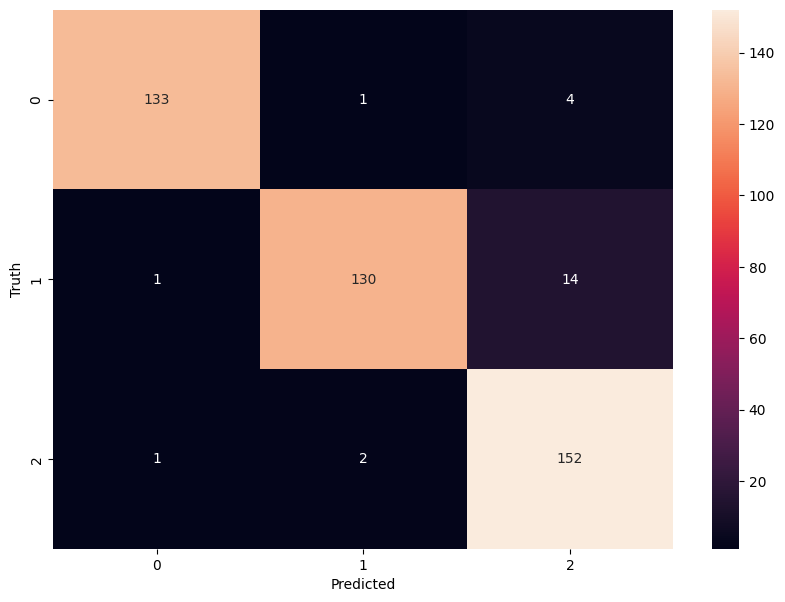

In [48]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
joblib.dump(model, 'neural_network.joblib')

['neural_network.joblib']

# Train with CNN

In [101]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [102]:
# Load and process the images
X = []
y = []


In [103]:
# Load rock images
for filename in os.listdir(rock_folder):
    if filename.endswith('.png'):
        image = cv2.imread(os.path.join(rock_folder, filename))
        image = cv2.resize(image, (image_width, image_height))  # Resize the image
        X.append(image)
        y.append(0)  # Rock class label

for filename in os.listdir(paper_folder):
    if filename.endswith('.png'):
        image = cv2.imread(os.path.join(paper_folder, filename))
        image = cv2.resize(image, (image_width, image_height))  # Resize the image
        X.append(image)
        y.append(1)  # Paper class label

for filename in os.listdir(scissor_folder):
    if filename.endswith('.png'):
        image = cv2.imread(os.path.join(scissor_folder, filename))
        image = cv2.resize(image, (image_width, image_height))  # Resize the image
        X.append(image)
        y.append(2)  # Scissor class label

In [104]:
# Convert the feature matrix and labels to numpy arrays
X = np.array(X)
y = np.array(y)

print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train[0][0][0]

(2188, 128, 128, 3)


array([ 56, 140,  39], dtype=uint8)

In [105]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255
X_train_scaled[0][0][0]

array([0.21960784, 0.54901961, 0.15294118])

In [106]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

2024-01-06 16:22:55.329628: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:22:55.330227: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:22:55.330941: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:22:55.331361: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


In [107]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [108]:
cnn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10


2024-01-06 16:23:00.104343: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:23:00.111333: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:23:00.265598: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:23:00.271473: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:23:00.274529: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:23:00.276960: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:23:00.560287: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


55/55 [==============================] - 2s 29ms/step - loss: 0.9400 - accuracy: 0.6177
Epoch 2/10
55/55 [==============================] - 2s 29ms/step - loss: 0.3532 - accuracy: 0.8709
Epoch 3/10
55/55 [==============================] - 2s 29ms/step - loss: 0.1610 - accuracy: 0.9503
Epoch 4/10
55/55 [==============================] - 2s 29ms/step - loss: 0.0813 - accuracy: 0.9760
Epoch 5/10
55/55 [==============================] - 2s 29ms/step - loss: 0.0692 - accuracy: 0.9777
Epoch 6/10
55/55 [==============================] - 2s 29ms/step - loss: 0.0233 - accuracy: 0.9966
Epoch 7/10
55/55 [==============================] - 2s 29ms/step - loss: 0.0085 - accuracy: 0.9994
Epoch 8/10
55/55 [==============================] - 2s 29ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 9/10
55/55 [==============================] - 2s 29ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/10
55/55 [==============================] - 2s 29ms/step - loss: 0.0011 - accuracy: 1.0000


In [109]:
cnn.evaluate(X_test_scaled,y_test)

 1/14 [=>............................] - ETA: 1s - loss: 0.1376 - accuracy: 0.9375

2024-01-06 16:23:23.132927: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:23:23.142292: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:23:23.190710: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:23:23.196014: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:23:23.199089: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:23:23.201523: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:23:23.254306: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


14/14 [==============================] - 0s 12ms/step - loss: 0.1892 - accuracy: 0.9612


[0.1892329305410385, 0.9611872434616089]

In [122]:
captured_image = cv2.imread(os.path.join('.', 'paper2.png'))
captured_image = captured_image / 255
captured_image = cv2.resize(captured_image, (image_width, image_height))
captured_image.shape

(128, 128, 3)

In [123]:
y_pred = cnn.predict(np.array([captured_image]))

1/1 [==============================] - 0s 11ms/step


2024-01-06 16:25:42.100285: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:25:42.126139: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:25:42.143629: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:25:42.158653: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:25:42.161782: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-01-06 16:25:42.163861: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


In [124]:
y_pred[0]

array([5.6830942e-07, 8.7844723e-01, 1.2155228e-01], dtype=float32)

In [125]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes

[1]